In [65]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [66]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [83]:
X = iris.data[:, 2:4]          # shape (150, 2)
y = (iris.target == 2).astype(int)  # Virginica vs Not
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Binary Logistic Regression trained with Gradient Descent (from scratch)

In [88]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def compute_cost(y, p):
    eps = 1e-15
    p = np.clip(p, eps, 1 - eps)
    return -np.mean(
        y * np.log(p) + (1 - y) * np.log(1 - p)
    )
    return loss
def scratch_logistic_regression():
    m, n = X_train.shape
    w = np.zeros(n)
    b = 0.0
    lr=0.1
    epochs = 5000
    
    for epoch in range(epochs):
        z = X_train.dot(w) + b
        p = sigmoid(z)
    
        loss = compute_cost(y_train, p)
        dz = p - y_train
    
        dw = 1/m * X_train.T.dot(dz)
        db = 1/m * np.sum(dz)
    
        w -= lr * dw
        b -= lr * db
    
        if epoch % 500 == 0:
            print(epoch, loss)

    z = X_test.dot(w) + b
    p = sigmoid(z)
    scratch_loss = compute_cost(y_test, p)
    predict = (p >= 0).astype(int)
    scratch_w1= w[0]
    scratch_w2=w[1]
    scratch_b = b
    scratch_decision_boundary_x1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(),  30)
    scratch_decision_boundary_x2 = -(scratch_w1 * scratch_decision_boundary_x1 + scratch_b) /scratch_w2
    
    return scratch_loss, scratch_w1, scratch_w2, scratch_b, scratch_decision_boundary_x1, scratch_decision_boundary_x2

0 0.6931471805599453
500 0.3028082792290164
1000 0.24695997341101858
1500 0.2200646454243669
2000 0.20291053464610628
2500 0.19052986635916422
3000 0.18095678350910968
3500 0.17322379932211057
4000 0.16678596138932314
4500 0.16130673038943702


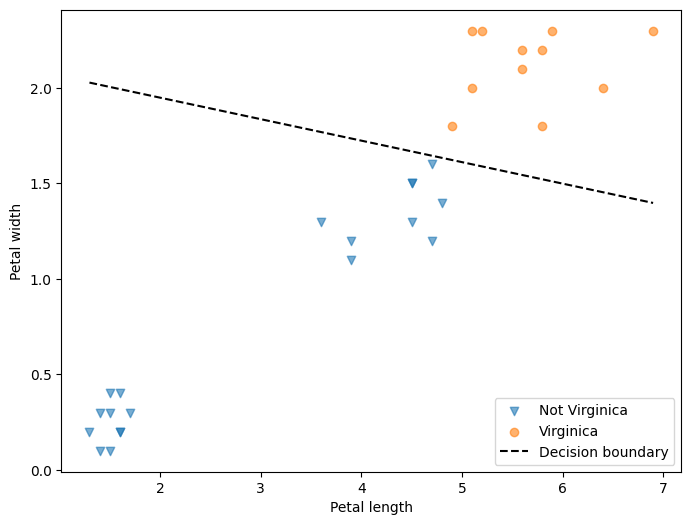

In [85]:
scratch_loss, scratch_w1, scratch_w2, scratch_b, scratch_decision_boundary_x1, scratch_decision_boundary_x2 = scratch_logistic_regression()
plt.figure(figsize=(8,6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label="Not Virginica", marker="v", alpha=0.6)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label="Virginica", alpha=0.6)

plt.plot(scratch_decision_boundary_x1, scratch_decision_boundary_x2, "k--", label="Decision boundary")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

## Binary Logistic Regression with sklearn

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def sklearn_logistic_regression():
    log_reg = LogisticRegression(
        solver="lbfgs",
    )
    log_reg.fit(X_train, y_train)

    sklearn_w1, sklearn_w2 = log_reg.coef_[0]
    sklearn_b = log_reg.intercept_[0]

    y_proba = log_reg.predict_proba(X_test)
    y_predict = log_reg.predict(X_test)

    sklearn_loss = log_loss(y_test, y_proba)

    sklearn_decision_boundary_x1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 30)
    sklearn_decision_boundary_x2 = -(sklearn_w1 * sklearn_decision_boundary_x1 + sklearn_b) / sklearn_w2
    decision_boundary = (x1, x2)
    return sklearn_loss, sklearn_w1, sklearn_w2, sklearn_b, sklearn_decision_boundary_x1, sklearn_decision_boundary_x2

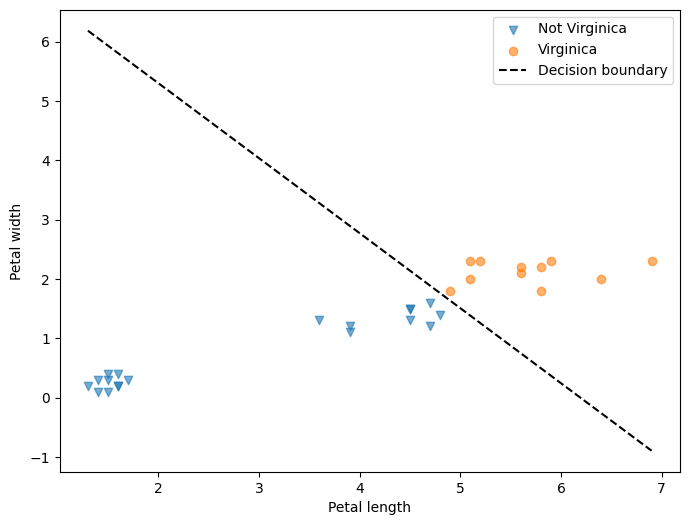

In [87]:
sklearn_loss, sklearn_w1, sklearn_w2, sklearn_b, sklearn_decision_boundary_x1, sklearn_decision_boundary_x2 = sklearn_logistic_regression()
plt.figure(figsize=(8,6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label="Not Virginica", marker="v", alpha=0.6)
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label="Virginica", alpha=0.6)

plt.plot(sklearn_decision_boundary_x1, sklearn_decision_boundary_x2, "k--", label="Decision boundary")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

## Compare Scratch and Sklearn

In [89]:
scratch_loss, scratch_w1, scratch_w2, scratch_b, scratch_decision_boundary_x1, scratch_decision_boundary_x2 = scratch_logistic_regression()
sklearn_loss, sklearn_w1, sklearn_w2, sklearn_b, sklearn_decision_boundary_x1, sklearn_decision_boundary_x2 = sklearn_logistic_regression()

0 0.6931471805599453
500 0.3028082792290164
1000 0.24695997341101858
1500 0.2200646454243669
2000 0.20291053464610628
2500 0.19052986635916422
3000 0.18095678350910968
3500 0.17322379932211057
4000 0.16678596138932314
4500 0.16130673038943702


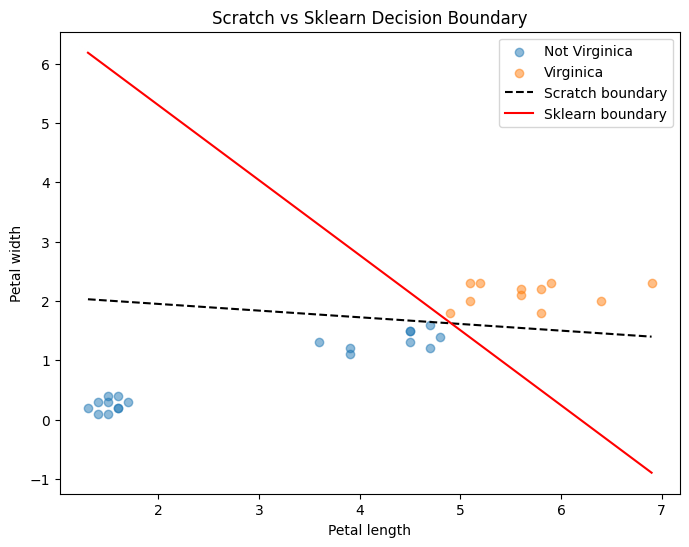

In [91]:
plt.figure(figsize=(8,6))

# data
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1],
            label="Not Virginica", alpha=0.5)
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1],
            label="Virginica", alpha=0.5)

# boundaries
plt.plot(scratch_decision_boundary_x1,
         scratch_decision_boundary_x2,
         "k--", label="Scratch boundary")

plt.plot(sklearn_decision_boundary_x1,
         sklearn_decision_boundary_x2,
         "r-", label="Sklearn boundary")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.title("Scratch vs Sklearn Decision Boundary")
plt.show()

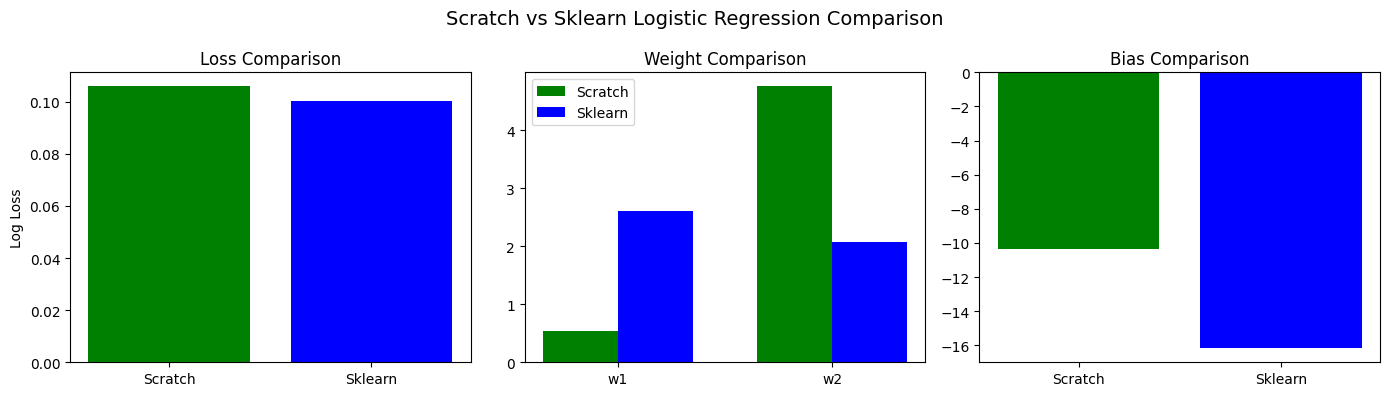

In [109]:
# data
loss_vals = [scratch_loss, sklearn_loss]
w1_vals = [scratch_w1, sklearn_w1]
w2_vals = [scratch_w2, sklearn_w2]
b_vals = [scratch_b, sklearn_b]

labels = ["Scratch", "Sklearn"]

# create subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

# -------- 1️⃣ Loss comparison --------
axs[0].bar(labels, loss_vals, color=["green", "blue"])
axs[0].set_title("Loss Comparison")
axs[0].set_ylabel("Log Loss")

# -------- 2️⃣ Weight comparison --------
x = np.arange(2)
width = 0.35

axs[1].bar(x - width/2, [scratch_w1, scratch_w2], width, label="Scratch", color="green")
axs[1].bar(x + width/2, [sklearn_w1, sklearn_w2], width, label="Sklearn", color="blue")

axs[1].set_xticks(x)
axs[1].set_xticklabels(["w1", "w2"])
axs[1].set_title("Weight Comparison")
axs[1].legend()

# -------- 3️⃣ Bias comparison --------
axs[2].bar(labels, b_vals, color=["green", "blue"])
axs[2].set_title("Bias Comparison")

plt.suptitle("Scratch vs Sklearn Logistic Regression Comparison", fontsize=14)
plt.tight_layout()
plt.show()

In [112]:
import pandas as pd

df = pd.DataFrame({
    "Scratch": [scratch_loss, scratch_w1, scratch_w2, scratch_b],
    "Sklearn": [sklearn_loss, sklearn_w1, sklearn_w2, sklearn_b]
}, index=["Loss", "w1", "w2", "b"])

df

,Scratch,Sklearn
Loss,0.105964,0.100367
w1,0.535563,2.614754
w2,4.757729,2.068368
b,-10.346332,-16.189341


Since Sklearn’s LogisticRegression uses L2 regularization (Ridge) by default, which explains why its learned weights are more balanced than an unregularized gradient-descent implementation, despite achieving similar loss values.